In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Pandas version 0.25.3
Matplotlib version 3.1.2


In [0]:
from sklearn.ensemble import RandomForestClassifier
from collections import OrderedDict
import csv
import os.path

In [0]:
#Reading encoded data
train_values = pd.read_csv('dummified_X.csv')
y_values = pd.read_csv('dummified_y.csv')

In [0]:
#Dropping unwanted 'Unnamed' column
train_values=train_values.drop('Unnamed: 0',axis=1)
y_values=y_values.drop('Unnamed: 0',axis=1)

In [0]:
#Selecting features

In [0]:
exclude = ("id", "test", "train", "status_group", "num_private", "scheme_name",
           'waterpoint_type_group',
           'quality_group',
           'payment_type',
           'extraction_type_group',
           'extraction_type_class',
           'management_group',
           'source_type',
           'source_class')

In [0]:
# Select all features except which start with a string in exclude
features = [col for col in list(train_values) if not col.startswith(exclude)]

In [0]:
final=train_values[features]

In [10]:
train_values[features].head()

,amount_tsh,days_since_recorded,gps_height,population,funder_District Council,funder_Kkkt,funder_Tasaf,funder_Unicef,funder_World Vision,funder_danida,funder_gov,funder_hesawa,funder_other,funder_rwssp,funder_world_bank,installer_Central government,installer_commu,installer_danida,installer_dwe,installer_gov,installer_hesawa,installer_kkkt,installer_other,installer_rwe,installer_tcrs,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,public_meeting_False,public_meeting_True,public_meeting_Unknown,scheme_management_Parastatal,scheme_management_company,scheme_management_other,...,permit_True,permit_Unknown,construction_year_00s,construction_year_10s,construction_year_60s,construction_year_70s,construction_year_80s,construction_year_90s,construction_year_unknown,extraction_type_afridev,extraction_type_gravity,extraction_type_indiamark2,extraction_type_indiamark3,extraction_type_ksb,extraction_type_mono,extraction_type_nira,extraction_type_other,extraction_type_submersible,extraction_type_swn,extraction_type_windmill,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_group_dry,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,6000.0,995,1390,109,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0.0,272,1399,280,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,25.0,281,686,250,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0.0,309,263,58,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0.0,874,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0


In [0]:
#StandardScaler to normalize
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
final_data=sc_x.fit_transform(train_values[features])

In [0]:
final_data=pd.DataFrame(final_data,columns=features)

In [0]:
import sklearn.model_selection 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(final_data, 
                                                                             y_values, 
                                                                             test_size = 0.3, 
                                                                             random_state = 0)

In [0]:
clf = RandomForestClassifier(n_estimators=50, 
                                 min_samples_leaf=2, 
                                 max_features=0.20, 
                                 oob_score=True, 
                                 random_state=20).fit(X_train[features],
                                                      y_train)

In [17]:
clf.score(X_train[features],y_train)

0.8640692640692641

In [18]:
clf.score(X_test[features],y_test)

0.7699775533108867

In [19]:
clf.feature_importances_

array([4.46727660e-02, 1.22738731e-01, 9.23606694e-02, 6.06676065e-02,
       1.61351021e-03, 1.12333696e-03, 1.90195789e-03, 1.87644091e-03,
       2.26320208e-03, 2.66447402e-03, 1.09638914e-02, 3.37274767e-03,
       1.21757277e-02, 1.88347112e-03, 3.20264220e-03, 9.27349039e-04,
       1.03274856e-03, 9.32909059e-04, 1.18591160e-02, 3.83174880e-03,
       1.53148328e-03, 7.02563001e-04, 1.15198548e-02, 4.58789988e-03,
       1.88404097e-03, 8.29765987e-03, 5.73514378e-03, 5.24414198e-03,
       9.70542333e-03, 9.16371827e-03, 6.12160664e-03, 5.48925436e-03,
       5.79724888e-03, 6.02307234e-03, 7.00496006e-03, 7.57740277e-03,
       4.06198711e-03, 2.88443283e-03, 3.70527216e-03, 5.17122674e-03,
       1.34399374e-03, 1.67461841e-04, 1.78066804e-04, 1.22556494e-02,
       5.74225406e-03, 3.40777242e-03, 3.09584774e-03, 6.10273980e-03,
       1.05772122e-02, 1.05738035e-02, 3.36040658e-03, 1.14347634e-02,
       1.04614085e-02, 1.03716222e-03, 1.10050829e-02, 7.82987167e-03,
      

In [0]:
clf = RandomForestClassifier(n_estimators=50, 
                                 min_samples_leaf=2, 
                                 max_features=0.50, 
                                 oob_score=True, 
                                 random_state=20).fit(X_train[features],
                                                      y_train)

In [31]:
clf.score(X_train[features],y_train)

0.8929052429052429

In [32]:
clf.score(X_test[features],y_test)

0.7726711560044893

In [0]:
clf = RandomForestClassifier(n_estimators=50, 
                                 min_samples_leaf=2, 
                                 max_features='auto', 
                                 oob_score=True, 
                                 random_state=20).fit(X_train[features],
                                                      y_train)

In [73]:
clf.score(X_train[features],y_train)

0.8640692640692641

In [72]:
clf.score(X_test[features],y_test)

0.7699775533108867

In [71]:
clf.oob_score_

0.8666265832932499

In [37]:
oob_score = round(1 - clf.oob_score_, 4)

print("OOB Error Score: " + str(oob_score))

OOB Error Score: 0.1358


In [54]:
list(zip(train_values[features], clf.feature_importances_))

[('amount_tsh', 0.04467276597315448),
 ('days_since_recorded', 0.12273873119168241),
 ('gps_height', 0.09236066938661483),
 ('population', 0.06066760654002296),
 ('funder_District Council', 0.0016135102063487077),
 ('funder_Kkkt', 0.0011233369634367342),
 ('funder_Tasaf', 0.0019019578939137413),
 ('funder_Unicef', 0.001876440905860816),
 ('funder_World Vision', 0.002263202083002159),
 ('funder_danida', 0.002664474024986841),
 ('funder_gov', 0.010963891386324682),
 ('funder_hesawa', 0.0033727476700147383),
 ('funder_other', 0.012175727666825351),
 ('funder_rwssp', 0.0018834711172525695),
 ('funder_world_bank', 0.0032026421999854673),
 ('installer_Central government', 0.0009273490386286816),
 ('installer_commu', 0.0010327485617640812),
 ('installer_danida', 0.0009329090587779303),
 ('installer_dwe', 0.011859116041186826),
 ('installer_gov', 0.003831748801252328),
 ('installer_hesawa', 0.0015314832809393921),
 ('installer_kkkt', 0.0007025630007947691),
 ('installer_other', 0.0115198547831

In [0]:
fi = sorted(list(zip(train_values[features], clf.feature_importances_)), key=lambda x: str(x[1]), reverse=True)

In [56]:
fi

[('water_quality_fluoride abandoned', 5.532126677157117e-06),
 ('waterpoint_type_dam', 2.3116703436496467e-05),
 ('quantity_group_dry', 0.12413943025964817),
 ('days_since_recorded', 0.12273873119168241),
 ('gps_height', 0.09236066938661483),
 ('population', 0.06066760654002296),
 ('waterpoint_type_other', 0.05232873748354664),
 ('amount_tsh', 0.04467276597315448),
 ('extraction_type_other', 0.040648115753811165),
 ('quantity_group_enough', 0.03554448099496066),
 ('waterpoint_type_communal standpipe multiple', 0.016589085757737643),
 ('quantity_group_insufficient', 0.015998887763487776),
 ('waterpoint_type_communal standpipe', 0.01483315261556279),
 ('extraction_type_gravity', 0.014672091431552453),
 ('scheme_management_vwc', 0.012255649356394505),
 ('funder_other', 0.012175727666825351),
 ('installer_dwe', 0.011859116041186826),
 ('installer_other', 0.011519854783163436),
 ('construction_year_00s', 0.011434763398980677),
 ('construction_year_70s', 0.011005082895948074),
 ('funder_gov'

In [0]:
last_fi = [fi[0] for fi in fi[-1:]]
exclude = exclude + tuple(last_fi)

In [58]:
last_fi

['scheme_management_swc']

In [61]:
print(last_fi)

['scheme_management_swc']


In [0]:
error_score = OrderedDict()

In [0]:
error_score[last_fi[0]] = oob_score

In [66]:
error_score

OrderedDict([('scheme_management_swc', 0.1358)])

In [76]:
fi = sorted(list(zip(train_values[features], clf.feature_importances_)), key=lambda x: str(x[1]), reverse=True)
last_fi = [fi[0] for fi in fi[-1::1]]
exclude = exclude + tuple(last_fi)
    
print(last_fi)
    
error_score[last_fi[0]] = oob_score

with open("feature_selection.csv", "w") as csv_file:
  writer = csv.writer(csv_file)
  for key, value in error_score.items():
    writer.writerow([key, value])
    csv_file.close()
        
    if len(fi) < 400:
            break

['scheme_management_swc']


30

In [80]:
pca = PCA(n_components=88)

pca.fit(X_train[features])

PCA(copy=True, iterated_power='auto', n_components=88, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
var= pca.explained_variance_ratio_

In [0]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)


In [83]:
print(var)

[5.25749493e-02 3.65759899e-02 3.27581073e-02 3.02275232e-02
 2.79589866e-02 2.60024498e-02 2.49921458e-02 2.36906484e-02
 2.24901511e-02 2.11650919e-02 2.08265660e-02 1.94759164e-02
 1.93322204e-02 1.82841917e-02 1.74267144e-02 1.66747342e-02
 1.63047418e-02 1.57367566e-02 1.56951037e-02 1.53974166e-02
 1.48208520e-02 1.46469956e-02 1.41772527e-02 1.40099008e-02
 1.36209852e-02 1.33280141e-02 1.30399416e-02 1.29663286e-02
 1.28148858e-02 1.25240036e-02 1.22476890e-02 1.21655365e-02
 1.20725181e-02 1.18540494e-02 1.16300388e-02 1.15269997e-02
 1.14401976e-02 1.13603860e-02 1.12433722e-02 1.11772164e-02
 1.08280648e-02 1.07454187e-02 1.07225224e-02 1.04737086e-02
 1.04367658e-02 1.02615383e-02 1.02085709e-02 9.96702826e-03
 9.89567054e-03 9.71620994e-03 9.52255251e-03 9.19861830e-03
 8.99296569e-03 8.93226643e-03 8.64133671e-03 8.54790393e-03
 8.33548712e-03 8.06861881e-03 7.96067510e-03 7.68260195e-03
 7.50461843e-03 7.41974402e-03 7.32029168e-03 6.88794517e-03
 6.74592456e-03 6.448913

In [84]:
print(var1)

[ 5.26  8.92 12.2  15.22 18.02 20.62 23.12 25.49 27.74 29.86 31.94 33.89
 35.82 37.65 39.39 41.06 42.69 44.26 45.83 47.37 48.85 50.31 51.73 53.13
 54.49 55.82 57.12 58.42 59.7  60.95 62.17 63.39 64.6  65.79 66.95 68.1
 69.24 70.38 71.5  72.62 73.7  74.77 75.84 76.89 77.93 78.96 79.98 80.98
 81.97 82.94 83.89 84.81 85.71 86.6  87.46 88.31 89.14 89.95 90.75 91.52
 92.27 93.01 93.74 94.43 95.1  95.74 96.37 96.97 97.51 98.02 98.52 98.94
 99.29 99.55 99.73 99.9  99.97 99.97 99.97 99.97 99.97 99.97 99.97 99.97
 99.97 99.97 99.97 99.97]


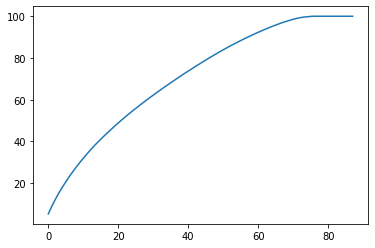

In [85]:
plt.plot(var1)

In [21]:
pca_final=PCA(n_components=70)
pca_final.fit(X_train[features])
pca_labelfit=PCA(n_components=70)

NameError: ignored

In [0]:
Xt=pca_final.fit_transform(X_train[features])
Xtest_t=pca_labelfit.fit_transform(X_test[features])

In [89]:
Xt.shape

(41580, 70)

In [0]:
clf = RandomForestClassifier(n_estimators=50, 
                             min_samples_leaf=2, 
                             max_features=0.20, 
                             oob_score=True, 
                             random_state=20).fit(Xt,
                                                  y_train)

In [97]:
clf.score(Xtest_t,y_test)

0.2441638608305275